# Итоговая работа.

In [313]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from scipy.optimize import minimize
from sklearn.decomposition import TruncatedSVD
import sympy as sym
%matplotlib inline

## Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [3]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

**a)** Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [300]:
def cosine(x, y=raitings):
    cosn = []
    cosn.append(np.abs(1 - np.apply_along_axis(distance.cosine, -1, y, x)))
    cosn = np.array(cosn)
    cosn[cosn == 1] = 0
    return cosn[0,:]

max_cosine = np.apply_along_axis(cosine, -1, raitings)

In [301]:
for i, j in enumerate(max_cosine.argmax(0)):
    print(f'Наиболее похожий пользователь {i} на пользователя {j}' )

Наиболее похожий пользователь 0 на пользователя 8
Наиболее похожий пользователь 1 на пользователя 4
Наиболее похожий пользователь 2 на пользователя 9
Наиболее похожий пользователь 3 на пользователя 9
Наиболее похожий пользователь 4 на пользователя 8
Наиболее похожий пользователь 5 на пользователя 9
Наиболее похожий пользователь 6 на пользователя 3
Наиболее похожий пользователь 7 на пользователя 5
Наиболее похожий пользователь 8 на пользователя 0
Наиболее похожий пользователь 9 на пользователя 2


**b)** Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [312]:
def TruncClassifier(raitings, k):
    svd = TruncatedSVD(n_components = k)
    raitings_reduced  = svd.fit_transform(raitings)
    return raitings_reduced

TruncClassifier(raitings, 5)  

array([[23.41982063, -5.36092136,  3.83196779, -4.06950174,  1.10267269],
       [24.76774917,  4.52188701,  1.35815965,  1.58128545,  8.59912002],
       [22.27728589, -6.96492049, -4.84461485, -0.47661647,  3.37152266],
       [19.4257757 ,  2.64575227, -6.86014009, -4.76604765,  1.96075707],
       [22.8146354 ,  0.51464093,  7.70180188,  4.42379773,  1.29124163],
       [21.76961656,  1.94294987, -4.56934779,  8.32306487, -2.21887359],
       [21.23427453,  9.78047778,  1.16340271, -4.86074521, -2.60815471],
       [19.97476815,  4.00048677, -1.67456316,  1.1512346 , -3.5637169 ],
       [26.39306998, -3.03090482,  5.86422753, -1.67503491, -3.71500141],
       [29.94016844, -4.82012297, -3.48912415,  0.05527083, -3.62526487]])

## Задание 2

Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ (на python и на бумаге).

In [48]:
x = sym.Symbol('x')

In [49]:
res = sym.diff(sym.tan(sym.sin(x) + sym.cos(2*x+3))**2)
res

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

In [50]:
from scipy.misc import derivative

In [54]:
def f(x):
    return sym.tan(sym.sin(x) + sym.cos(2*x+3))**2
derivative(f, 1, dx=1e-6)

55.3859176433136

Производная

$tg^2(sin(x) + cos(2x+3))$

$2tg(sin(x) + cos(2x+3))*(tg^2(sin(x) + cos(2x + 3)) + 1)*(cos(x) - 2*sin(2x+3))$


In [62]:
2 * np.tan(np.sin(1) + np.cos(2*1+3)) * (np.tan(np.sin(1) + np.cos(2*1+3))**2 + 1) * (np.cos(1) - 2*np.sin(2*1+3))

55.385917635337854

## Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку **error**.

In [113]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [114]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [115]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

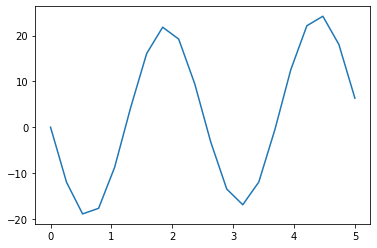

In [116]:
plt.plot(x, fx)
plt.show()

In [117]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [187]:
minimize(error, (0, 1), method = 'nelder-mead', options = {'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 228.356720
         Iterations: 122
         Function evaluations: 236


 final_simplex: (array([[1.95282586, 1.56625208],
       [1.95282585, 1.56625208],
       [1.95282586, 1.56625208]]), array([228.3567197, 228.3567197, 228.3567197]))
           fun: 228.3567196969465
       message: 'Optimization terminated successfully.'
          nfev: 236
           nit: 122
        status: 0
       success: True
             x: array([1.95282586, 1.56625208])

In [185]:
print('Параметры a, b - 1.95282586, 1.56625208')

Параметры a, b - 1.95282586, 1.56625208


## Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [108]:
X = np.random.random(20)
X

array([0.56194298, 0.77611272, 0.08075678, 0.75678377, 0.68665269,
       0.17216013, 0.20551361, 0.16549715, 0.26143933, 0.81159026,
       0.79867739, 0.98191481, 0.71503183, 0.41191969, 0.15241515,
       0.63565807, 0.41676636, 0.09167592, 0.58500658, 0.64878126])

In [112]:
X.mean()

0.45560651338870384

<AxesSubplot:ylabel='Count'>

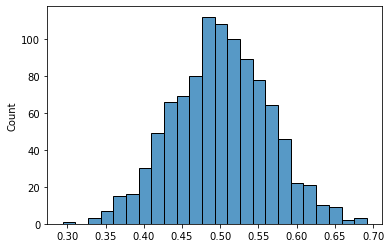

In [111]:
mList=[]
for kk in range(1000):
    X = np.random.random(20)
    mList.append(X.mean())
    
sns.histplot(mList)

## Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге):

In [64]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [65]:
np.linalg.eig(m)

(array([ 3., -1.]),
 array([[ 0.89442719, -0.89442719],
        [ 0.4472136 ,  0.4472136 ]]))

Из свойств собственных значений получаем систему линейных уравнений:

x + 4y = lx

x + y = ly


x(1-l) + 4y = 0

x + y(1-l) = 0

[1-l, 4

1, 1-l]

(1-l)*(1-l) - 4 = 0

l^2 - 2l - 3 = 0

Решив уравнение получаем 3 и -1

Далее ищем собственные вектора для l=3 и l=-1

Получаем [1, 0,5] и [1, -0.5] соответственно